# Import Dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('AdmissionPredict.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,NaN
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,378.000000,380.000000,400.000000,400.000000,400.000000,380.000000,400.000000,384.000000
mean,200.500000,316.759259,107.386842,3.087500,3.400000,3.452500,8.604737,0.547500,0.724375
std,115.614301,11.415599,6.048645,1.143728,1.006869,0.898478,0.599167,0.498362,0.142964
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.250000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.080000,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          378 non-null    float64
 2   TOEFL Score        380 non-null    float64
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               380 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    384 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


# Data Exploratory Analysis

## Dealing With Missing Data
Let's see which column has NaN values : 

In [8]:
df.isnull().sum()

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit      16
dtype: int64

Let's drop NaN values in Chance of Admit column:

In [9]:
df = df[df['Chance of Admit'].notna()]
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65
5,6,330.0,115.0,5,4.5,3.0,9.34,1,0.90
...,...,...,...,...,...,...,...,...,...
394,395,329.0,111.0,4,4.5,4.0,9.23,1,0.89
395,396,324.0,110.0,3,3.5,3.5,9.04,1,0.82
397,398,330.0,116.0,4,5.0,4.5,9.45,1,0.91
398,399,312.0,103.0,3,3.5,4.0,8.78,0,0.67


## For filling NaN vlues, we have 2 options:

1) Filling with median vlue of each column:

In [10]:
# we have missing data, only in 'GRE Score', 'TOEFL Score' and 'CGPA' columns.
temp_df_nonan = df.copy()
temp_df_nonan['GRE Score'].replace(np.nan, temp_df_nonan['GRE Score'].median(), inplace=True)
temp_df_nonan['TOEFL Score'].replace(np.nan, temp_df_nonan['TOEFL Score'].median(), inplace=True)
temp_df_nonan['CGPA'].replace(np.nan, temp_df_nonan['CGPA'].median(), inplace=True)
temp_df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         384 non-null    int64  
 1   GRE Score          384 non-null    float64
 2   TOEFL Score        384 non-null    float64
 3   University Rating  384 non-null    int64  
 4   SOP                384 non-null    float64
 5   LOR                384 non-null    float64
 6   CGPA               384 non-null    float64
 7   Research           384 non-null    int64  
 8   Chance of Admit    384 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 30.0 KB


2) Finding correlation and filling with mean of subset of each column: (we choose this method for other parts)

### GRE Score

In [11]:
df.corr()['GRE Score'].drop('GRE Score').sort_values(ascending = False)

TOEFL Score          0.840993
CGPA                 0.830727
Chance of Admit      0.805076
University Rating    0.671549
SOP                  0.620963
Research             0.588385
LOR                  0.556729
Serial No.          -0.105022
Name: GRE Score, dtype: float64

We will group the dataframe by University Rating(Because there's a high correlation between ) and calculate the average value for GRE Score per University Rating

In [12]:
Per_UR = df.groupby('University Rating').mean()['GRE Score']
Per_UR

University Rating
1    303.520000
2    309.410526
3    315.790323
4    324.671875
5    328.642857
Name: GRE Score, dtype: float64

In [13]:
def fill_nan(uni_rating, second) :
  if np.isnan(second) : 
    return Per_UR[uni_rating]
  else :
    return second

df['GRE Score'] = df.apply(lambda row : fill_nan(row['University Rating'],row['GRE Score']),axis = 1)

In [14]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score          19
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit       0
dtype: int64

### TOEFL Score Column

In [15]:
df.corr()['TOEFL Score'].drop('TOEFL Score').sort_values(ascending = False)

GRE Score            0.834685
CGPA                 0.828364
Chance of Admit      0.783667
University Rating    0.689511
SOP                  0.647810
LOR                  0.556272
Research             0.509609
Serial No.          -0.153994
Name: TOEFL Score, dtype: float64

In [16]:
Per_UR = df.groupby('University Rating').mean()['TOEFL Score']
Per_UR

University Rating
1     99.240000
2    103.729167
3    107.000000
4    111.530303
5    113.800000
Name: TOEFL Score, dtype: float64

In [17]:
df['TOEFL Score'] = df.apply(lambda row : fill_nan(row['University Rating'],row['TOEFL Score']),axis = 1)

In [18]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit       0
dtype: int64

### CGPA Column

In [19]:
df.corr()['CGPA'].drop('CGPA').sort_values(ascending = False)

Chance of Admit      0.872492
GRE Score            0.824538
TOEFL Score          0.824481
University Rating    0.750312
SOP                  0.720422
LOR                  0.669002
Research             0.527005
Serial No.          -0.058785
Name: CGPA, dtype: float64

In [20]:
Per_UR = df.groupby('University Rating').mean()['CGPA']
Per_UR

University Rating
1    7.750000
2    8.196064
3    8.550000
4    9.020746
5    9.316909
Name: CGPA, dtype: float64

In [21]:
df['CGPA'] = df.apply(lambda row : fill_nan(row['University Rating'],row['CGPA']),axis = 1)

In [22]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Scatterplot

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

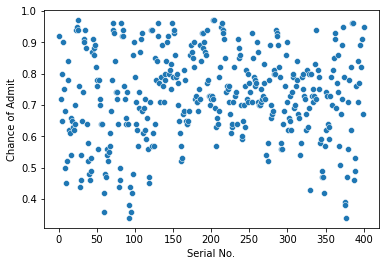

In [24]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'Serial No.')

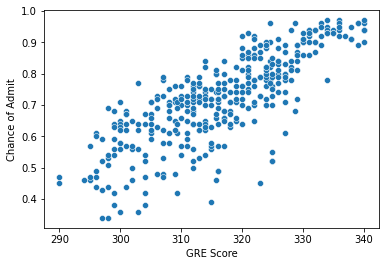

In [25]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'GRE Score')

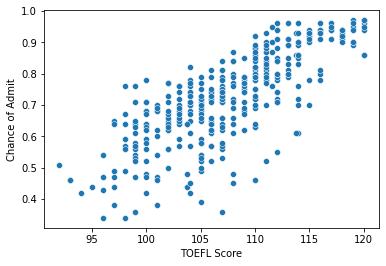

In [26]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'TOEFL Score')

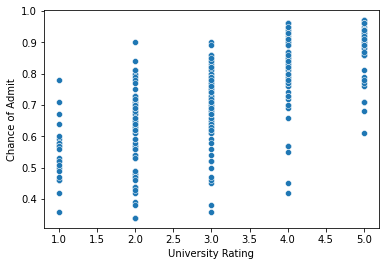

In [27]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'University Rating')

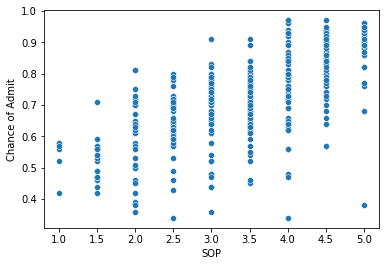

In [28]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'SOP')

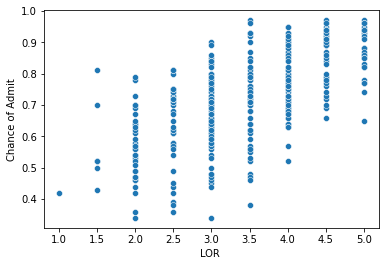

In [29]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'LOR ')

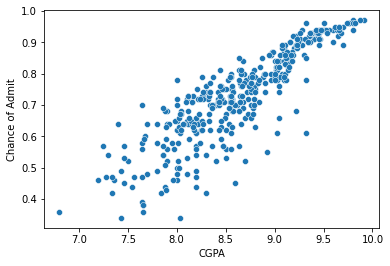

In [30]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'CGPA')

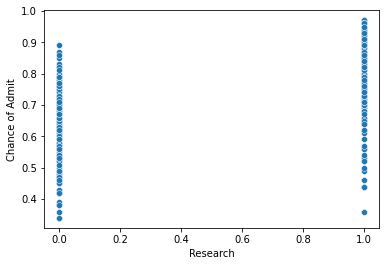

In [31]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'Research')

It seems **CGPA** correlates more with Chance of Admission. if you ignore noisy points in plot, you can fit a straight line to example points of dataset in plot, approximately.

# Training the model

## Train / Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop(['Serial No.','Chance of Admit'],axis = 1)
y = df['Chance of Admit']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_mat = np.c_[np.ones(X_train.shape[0]), X_train['CGPA']]
X_test_mat = np.c_[np.ones(X_test.shape[0]), X_test['CGPA']]

X_train_mat_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled['CGPA']]
X_test_mat_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled['CGPA']]

In [38]:
X_train_mat_scaled

array([[1.        , 0.28782288],
       [1.        , 0.49815498],
       [1.        , 0.46125461],
       [1.        , 0.29520295],
       [1.        , 0.25461255],
       [1.        , 0.17343173],
       [1.        , 0.3800738 ],
       [1.        , 0.72693727],
       [1.        , 0.74538745],
       [1.        , 0.16236162],
       [1.        , 0.53505535],
       [1.        , 0.37638376],
       [1.        , 0.53505535],
       [1.        , 0.39483395],
       [1.        , 0.29520295],
       [1.        , 0.74538745],
       [1.        , 0.73062731],
       [1.        , 0.29520295],
       [1.        , 0.25830258],
       [1.        , 0.58302583],
       [1.        , 0.31734317],
       [1.        , 0.16236162],
       [1.        , 0.46863469],
       [1.        , 0.67896679],
       [1.        , 0.64944649],
       [1.        , 0.96678967],
       [1.        , 0.50553506],
       [1.        , 0.36900369],
       [1.        , 0.84870849],
       [1.        , 0.3099631 ],
       [1.

## Performing Linear Regression Using the Normal Equation

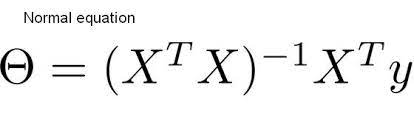


In [39]:
from numpy.linalg import inv

X_train_transpose = np.transpose(X_train_mat)
theta = np.matmul(np.matmul(inv(np.matmul(X_train_transpose, X_train_mat)),X_train_transpose),y_train)

X_train_transpose = np.transpose(X_train_mat_scaled)
theta_scaled = np.matmul(np.matmul(inv(np.matmul(X_train_transpose, X_train_mat_scaled)),X_train_transpose),y_train)

# with non scaled train set
print(theta)
print('='*50)
# with scaled train set
print(theta_scaled)

[-1.11468397  0.21383338]
[0.42491634 0.57948845]


### Plotting Predictor fucntion on scatter plot of data set

In [40]:
def predict(theta, data):
  return np.matmul(data,theta)

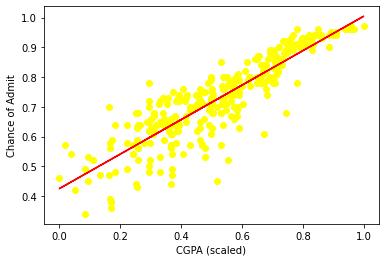

In [41]:
# scatter plot of training set
plt.scatter(X_train_scaled['CGPA'], y_train,c='yellow')

# predictor function (a line)
plt.plot(X_train_scaled['CGPA'], predict(theta_scaled, X_train_mat_scaled), c='r')

plt.xlabel('CGPA (scaled)')
plt.ylabel('Chance of Admit')
plt.show()

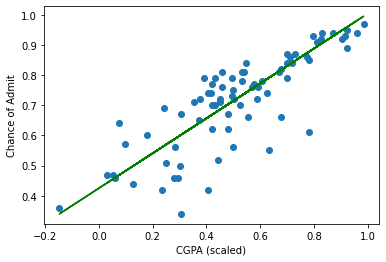

In [42]:
# scatter plot of test set
plt.scatter(X_test_scaled['CGPA'], y_test)

# output of predictor function (a line)
plt.plot(X_test_scaled['CGPA'], predict(theta_scaled, X_test_mat_scaled), c='green')

plt.xlabel('CGPA (scaled)')
plt.ylabel('Chance of Admit')
plt.show()

### Evaluating the model

In [43]:
from sklearn.metrics import mean_squared_error,explained_variance_score

In [44]:
predictions_scaled = predict(theta_scaled, X_test_mat_scaled)
predictions = predict(theta, X_test_mat)

### evaluation without scaling

In [45]:
np.sqrt(mean_squared_error(y_test,predictions))

0.09045138251027339

In [46]:
explained_variance_score(y_test,predictions)

0.667789910121453

### evaluation with scaling

In [47]:
np.sqrt(mean_squared_error(y_test,predictions_scaled))

0.0904513825102781

In [48]:
explained_variance_score(y_test,predictions_scaled)

0.6677899101214168

### Using Scikit Learn (only scaled values)

In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(pd.DataFrame(X_train_scaled['CGPA']), y_train)
predictions = reg.predict(pd.DataFrame(X_test_scaled['CGPA']))
predictions

array([0.72855973, 0.7584964 , 0.57032303, 0.45485301, 0.33938299,
       0.5874297 , 0.98088311, 0.71359139, 0.69006972, 0.81409308,
       0.95522311, 0.9295631 , 0.71145306, 0.66868638, 0.66868638,
       0.63019638, 0.66868638, 0.71145306, 0.77560307, 0.67510138,
       0.83119975, 0.59598304, 0.68151639, 0.5617697 , 0.7456664 ,
       0.46768301, 0.65157971, 0.60239804, 0.94880811, 0.75421973,
       0.87758215, 0.76704974, 0.7649114 , 0.6002597 , 0.84189142,
       0.73711306, 0.74138973, 0.95949977, 0.69006972, 0.83119975,
       0.90604143, 0.81836975, 0.44202301, 0.70289972, 0.9039031 ,
       0.95949977, 0.89534976, 0.45912968, 0.60239804, 0.66013305,
       0.66013305, 0.78843307, 0.56604636, 0.99585145, 0.83119975,
       0.58956803, 0.88679643, 0.71572973, 0.71359139, 0.68579305,
       0.87396642, 0.7328364 , 0.49761968, 0.64302638, 0.67510138,
       0.66654805, 0.48051301, 0.87824309, 0.81836975, 0.64088804,
       0.70289972, 0.7328364 , 0.84830642, 0.83761475, 0.79270

### Plotting

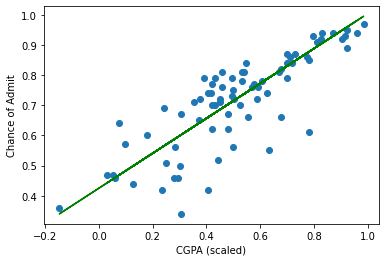

In [50]:
# scatter plot of test set
plt.scatter(X_test_scaled['CGPA'], y_test)

# output of predictor function (a line)
plt.plot(X_test_scaled['CGPA'], predictions, c='green')

plt.xlabel('CGPA (scaled)')
plt.ylabel('Chance of Admit')
plt.show()

### Evaluation

In [51]:
np.sqrt(mean_squared_error(y_test,predictions))

0.09045138251027808

In [52]:
explained_variance_score(y_test,predictions)

0.6677899101214173

## Training Model with 3 features

### we choose 'CGPA', 'GRE Score' and 'TOEFL Score' as 3 features

In [53]:
reg = LinearRegression().fit(X_train_scaled[['GRE Score', 'TOEFL Score', 'CGPA']], y_train)
predictions = reg.predict(X_test_scaled[['GRE Score', 'TOEFL Score', 'CGPA']])
predictions

array([0.72476773, 0.7643534 , 0.5342631 , 0.44751534, 0.37978076,
       0.57304369, 0.96023504, 0.66088914, 0.70831422, 0.82484739,
       0.95674097, 0.94112815, 0.71470286, 0.70452154, 0.64136751,
       0.60490541, 0.67420525, 0.72856302, 0.77018938, 0.66693167,
       0.85062006, 0.63085835, 0.71143778, 0.55739525, 0.74016375,
       0.5219926 , 0.65283892, 0.57636422, 0.96237998, 0.74908767,
       0.81904258, 0.77253129, 0.76489842, 0.6155005 , 0.84812869,
       0.75195882, 0.73698113, 0.97726659, 0.70916712, 0.8246062 ,
       0.93311258, 0.77436641, 0.44578611, 0.71441482, 0.90817233,
       0.96429495, 0.92519168, 0.44287934, 0.56858124, 0.65159768,
       0.66640753, 0.76246544, 0.57635597, 0.99308857, 0.83587203,
       0.57115214, 0.89458898, 0.76120738, 0.73015433, 0.66447527,
       0.87896397, 0.73658623, 0.48019435, 0.63176064, 0.6642661 ,
       0.68473268, 0.51160309, 0.86483919, 0.8176527 , 0.6474411 ,
       0.66330993, 0.74884745, 0.85464403, 0.82678579, 0.80463

### Plotting


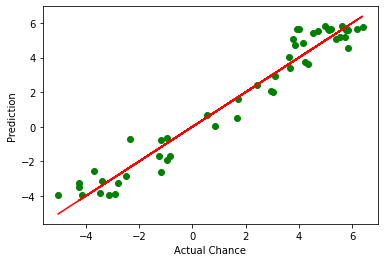

In [90]:
import seaborn as sns
# scatter plot of test set
plt.plot(y_test,y_test,'r')

# output of predictor function (a line)
plt.scatter(y_test, predictions, c='green')

plt.xlabel('Actual Chance')
plt.ylabel('Prediction')
plt.show()

### Evaluation

#### as results below shows, MSE is lower than former part which means our model is predicting better

In [55]:
np.sqrt(mean_squared_error(y_test,predictions))

0.08369232434585369

In [56]:
explained_variance_score(y_test,predictions)

0.7163603184884166

## Training Model with all features of training set

In [57]:
reg = LinearRegression().fit(X_train_scaled, y_train)
predictions = reg.predict(X_test_scaled)
predictions

array([0.69258208, 0.81044288, 0.51310898, 0.45419164, 0.41815956,
       0.58656033, 0.96835885, 0.66388966, 0.73442086, 0.79897339,
       0.94701322, 0.95539983, 0.71502732, 0.74225043, 0.67048096,
       0.60906844, 0.64987854, 0.72660227, 0.78182432, 0.70040323,
       0.83204485, 0.65202882, 0.7370366 , 0.56705457, 0.71456166,
       0.54450931, 0.66018763, 0.59050255, 0.95158175, 0.75348727,
       0.7898388 , 0.7682848 , 0.72111588, 0.63795012, 0.81181554,
       0.78457268, 0.73335528, 0.93813201, 0.64606667, 0.81306901,
       0.93743907, 0.80528176, 0.48915406, 0.69371513, 0.89432217,
       0.96177364, 0.92125878, 0.44221111, 0.57322734, 0.61250893,
       0.70244802, 0.77584558, 0.55531143, 0.99406201, 0.80993688,
       0.54892312, 0.90795649, 0.76566316, 0.75064753, 0.63427477,
       0.90600008, 0.77946092, 0.50299323, 0.64243595, 0.6647382 ,
       0.68195785, 0.50693471, 0.83263111, 0.80717519, 0.63238343,
       0.65395333, 0.72136173, 0.86819596, 0.85715903, 0.78372

### Plotting

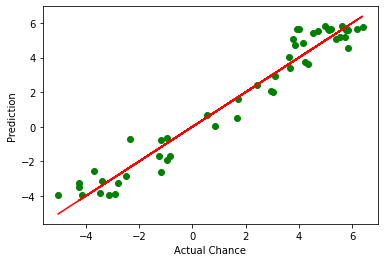

In [91]:
# scatter plot of test set
plt.plot(y_test,y_test,'r')

# output of predictor function (a line)
plt.scatter(y_test, predictions, c='green')

plt.xlabel('Actual Chance')
plt.ylabel('Prediction')
plt.show()

### Evaluation

#### as results below shows, MSE is lower than former part which means our model is predicting better

In [59]:
np.sqrt(mean_squared_error(y_test,predictions))

0.08358009329950628

In [60]:
explained_variance_score(y_test,predictions)

0.7176123476324897

# Section 2

Text(0, 0.5, 'y')

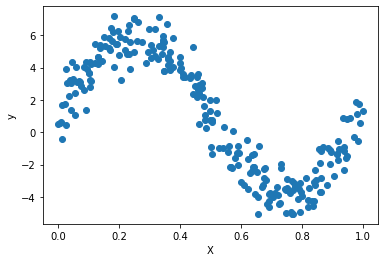

In [61]:
sample_size = 250
X = np.random.uniform(size=sample_size)
y = 5 * np.sin(X * 2 * np.pi)
y = y + np.random.normal(size=sample_size, loc=1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

#### degree 1

In [62]:
df = pd.DataFrame(np.c_[np.ones(sample_size), X], columns=[0,1])
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

array([-1.60324279,  1.68498026,  4.41799593,  5.19951873,  5.29747951,
        3.56144803,  2.12479891,  4.15121652,  2.72833745,  1.12062602,
        2.68689078, -2.41698525,  1.14006581,  3.40064082,  3.88352576,
        5.39682555,  2.28566063, -0.74475563,  4.484272  ,  2.51893388,
       -2.42874836, -1.41324169,  3.77418181,  3.05470066, -3.29964594,
       -3.11379662,  0.4934083 ,  2.42387043, -3.12282776, -1.42114315,
       -2.72894189, -0.52734725,  3.41523688, -0.688142  ,  4.84029345,
       -1.63000505, -2.22559848,  1.21104433,  4.43676321, -0.89577663,
        2.06081307,  3.84611454,  2.28629986,  0.04649934,  3.74182472,
       -2.63785946,  3.27061852, -1.73458461,  2.23520681,  1.96343772])

Plotting

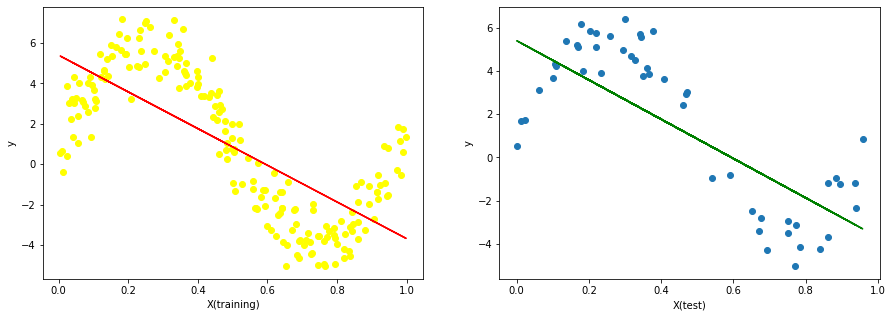

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of training set
axes[0].scatter(x_train[1], y_train, c='yellow')

# output of predictor function (a line)
axes[0].plot(x_train[1], reg.predict(x_train), c='red')

# scatter plot of test set
axes[1].scatter(x_test[1], y_test)

# output of predictor function (a line)
axes[1].plot(x_test[1], predictions, c='green')

axes[0].set_xlabel('X(training)')
axes[0].set_ylabel('y')
axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
plt.show()

Evaluation

In [64]:
np.sqrt(mean_squared_error(y_test,predictions))

2.285987474333589

In [65]:
explained_variance_score(y_test,predictions)

0.6077952835853988

#### Degree 3

In [66]:
df[2], df[3] = np.power(X, 2), np.power(X, 3)

#split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

#scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

array([-3.88348875,  3.37321634,  4.50463859,  1.0957433 ,  0.50282982,
        5.92347211,  4.44212364,  5.18067585,  5.52120471,  1.79483108,
        5.46508633, -3.11449233,  1.85143893,  5.96555156,  5.63893345,
       -0.13914255,  4.78024931, -3.04759801,  4.30066617,  5.20836033,
       -3.08968364, -3.82433543,  5.76683986,  5.85301511,  0.03439323,
       -0.85933423, -0.04193244,  5.04340118, -0.81892521, -3.82837285,
       -2.30807594, -2.63647411,  5.96432414, -2.94700268,  2.94344054,
       -3.88527184, -3.45953395,  2.05724365,  4.44837489, -3.29188118,
        4.2989193 ,  5.68643708,  4.78152683, -1.28101725,  5.79839002,
       -2.57608243,  5.95450015, -3.87604494,  4.67772046,  4.07226621])

Plotting

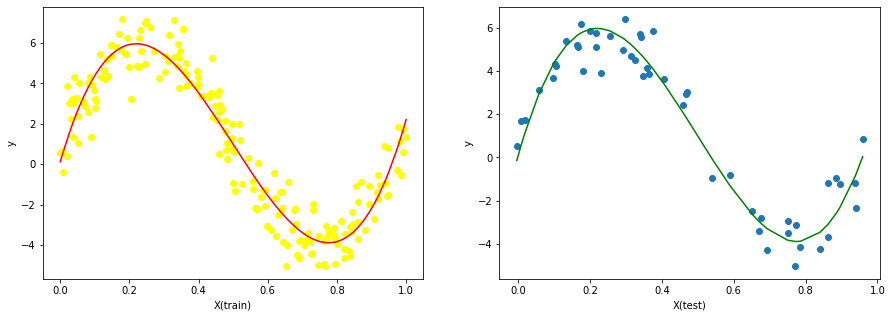

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of train set
axes[0].scatter(np.transpose(x_train)[1], y_train, c='yellow')

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_train)[1], reg.predict(x_train)), key=lambda x: x[0])))
axes[0].plot(unziped[0], unziped[1], c='red')

# scatter plot of test set
axes[1].scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes[1].plot(unziped[0], unziped[1], c='green')


axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
axes[0].set_xlabel('X(train)')
axes[0].set_ylabel('y')
plt.show()


Evaluation

In [68]:
np.sqrt(mean_squared_error(y_test,predictions))

0.8798633168671822

In [69]:
explained_variance_score(y_test,predictions)

0.9403255132354238

### Degree 7

In [70]:
df_mat = np.c_[df.to_numpy(), df.to_numpy() * np.c_[np.power(X, 4)]]
print(df_mat.shape)
#split
x_train, x_test, y_train, y_test = train_test_split(df_mat, y, test_size=0.2, random_state=42)

# #scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0,0,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0,0,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

(250, 8)


array([-3.8223956 ,  3.76036783,  4.09986107,  1.60249983,  1.20418876,
        5.66405551,  4.8662145 ,  4.72327913,  5.76514005,  1.96194919,
        5.72909345, -2.68973397,  2.02831362,  5.80289568,  5.22965818,
        0.77384176,  5.18178653, -3.41317284,  3.92752834,  5.54319099,
       -2.66381984, -3.8803631 ,  5.39954541,  5.91138121, -0.082101  ,
       -0.74415203, -0.20691719,  5.41010991, -0.71347048, -3.87962251,
       -1.92064855, -3.04273064,  5.79254412, -3.32650372,  2.88311932,
       -3.80756256, -3.07570436,  2.26880728,  4.0517574 , -3.60937754,
        4.72651003,  5.29028825,  5.18293542, -1.62856174,  5.4454961 ,
       -2.16249408,  5.87477733, -3.73410165,  5.0884421 ,  4.49923569])

plotting

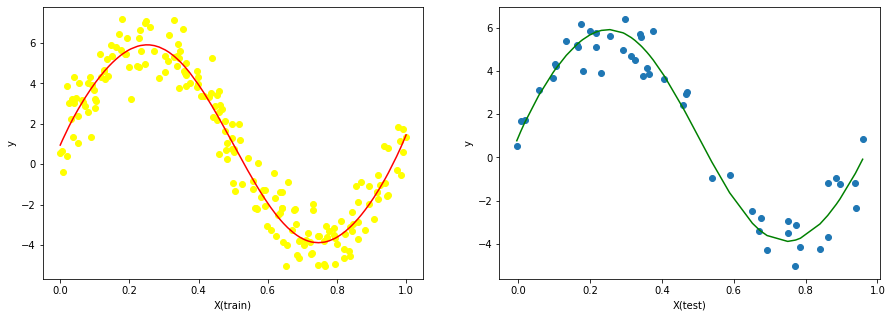

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of train set
axes[0].scatter(np.transpose(x_train)[1], y_train, c='yellow')

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_train)[1], reg.predict(x_train)), key=lambda x: x[0])))
axes[0].plot(unziped[0], unziped[1], c='red')

# scatter plot of test set
axes[1].scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes[1].plot(unziped[0], unziped[1], c='green')


axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
axes[0].set_xlabel('X(train)')
axes[0].set_ylabel('y')
plt.show()

Evaluation

In [72]:
np.sqrt(mean_squared_error(y_test,predictions))

0.8212012771584085

In [73]:
explained_variance_score(y_test,predictions)

0.9480628084084165

### Degree 11

In [74]:
df_mat = np.c_[df_mat, df.to_numpy() * np.c_[np.power(X, 8)]]
print(df_mat.shape)
#split
x_train, x_test, y_train, y_test = train_test_split(df_mat, y, test_size=0.2, random_state=42)

# #scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

(250, 12)


array([-3.89349861,  3.90917505,  3.87485321,  1.84357297,  0.92739988,
        5.79531957,  4.89679953,  4.64373112,  5.65553507,  1.99592712,
        5.61877068, -2.78916825,  2.07083987,  5.89588217,  5.31338671,
       -0.67235597,  5.1531511 , -3.18325382,  3.69460927,  5.44950551,
       -2.75212822, -3.8074486 ,  5.52070204,  5.87156839, -0.17786263,
       -0.55358929, -0.43381206,  5.33819912, -0.53356791, -3.81240804,
       -1.70934826, -2.91145481,  5.89018982, -3.11699164,  2.95544191,
       -3.89891957, -3.31569855,  2.34063766,  3.8228276 , -3.34874886,
        4.78073647,  5.38926275,  5.15407686, -1.81801976,  5.57347783,
       -2.03569023,  5.91985102, -3.89987151,  5.07786343,  4.58705696])

Plotting

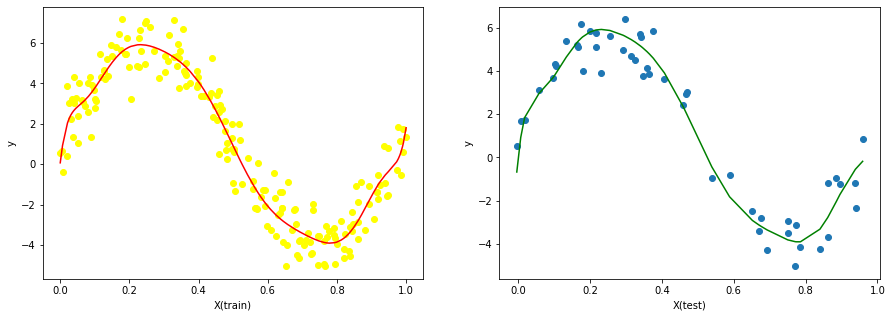

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of train set
axes[0].scatter(np.transpose(x_train)[1], y_train, c='yellow')

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_train)[1], reg.predict(x_train)), key=lambda x: x[0])))
axes[0].plot(unziped[0], unziped[1], c='red')

# scatter plot of test set
axes[1].scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes[1].plot(unziped[0], unziped[1], c='green')


axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
axes[0].set_xlabel('X(train)')
axes[0].set_ylabel('y')
plt.show()

evaluation

In [76]:
np.sqrt(mean_squared_error(y_test,predictions))

0.8469189461485328

In [77]:
explained_variance_score(y_test,predictions)

0.9446716880610666

### Degree 16

In [78]:
df_mat = np.c_[df_mat, df.to_numpy() * np.c_[np.power(X, 12)], np.c_[np.power(X, 16)]]
print(df_mat.shape)
#split
x_train, x_test, y_train, y_test = train_test_split(df_mat, y, test_size=0.2, random_state=42)

# #scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

(250, 17)


array([-4.0438563 ,  3.95480826,  3.74641006,  1.85090603,  0.77415552,
        5.8283128 ,  5.02710269,  4.83531933,  5.53029129,  1.93311897,
        5.52032979, -2.62136346,  2.00906107,  5.77045149,  5.60128255,
       -0.49986685,  5.26096449, -3.10937834,  3.50236151,  5.45660897,
       -2.58940957, -3.96116001,  5.75308362,  5.6054407 ,  0.01387451,
       -0.67107862, -0.47210171,  5.39515543, -0.63923239, -3.96732577,
       -1.80164521, -2.81706395,  5.77765697, -3.03332409,  2.91816489,
       -4.04296172, -3.13703905,  2.28422301,  3.67436837, -3.31613003,
        4.90955662,  5.66352191,  5.26172141, -1.80170366,  5.7813051 ,
       -2.03571982,  5.70145395, -4.00543978,  5.19699391,  4.70411933])

Plotting


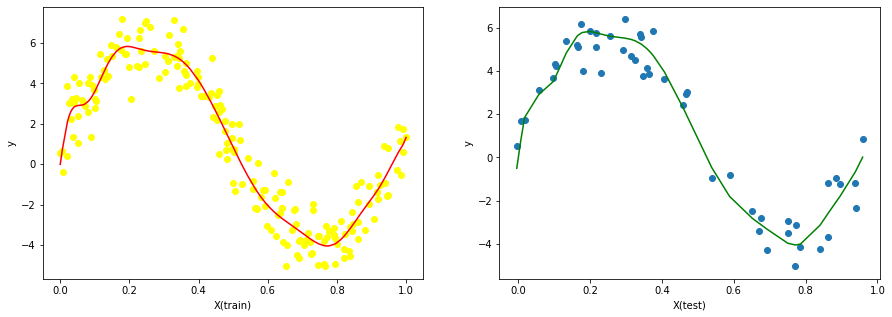

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of train set
axes[0].scatter(np.transpose(x_train)[1], y_train, c='yellow')

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_train)[1], reg.predict(x_train)), key=lambda x: x[0])))
axes[0].plot(unziped[0], unziped[1], c='red')

# scatter plot of test set
axes[1].scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes[1].plot(unziped[0], unziped[1], c='green')


axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
axes[0].set_xlabel('X(train)')
axes[0].set_ylabel('y')
plt.show()

Evaluation

In [80]:
np.sqrt(mean_squared_error(y_test,predictions))

0.8476341811656453

In [81]:
explained_variance_score(y_test,predictions)

0.9446020022828876

### Degree 20

In [82]:
df_mat = np.c_[df_mat, df.to_numpy() * np.c_[np.power(X, 17)]]
print(df_mat.shape)
#split
x_train, x_test, y_train, y_test = train_test_split(df_mat, y, test_size=0.2, random_state=42)

# #scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

(250, 21)


array([-3.91794609,  4.01126095,  3.72382039,  1.59329203,  0.52854885,
        5.60108799,  4.86615227,  5.05473764,  5.79996291,  2.00405484,
        5.76560577, -2.60891174,  2.09294696,  5.60303309,  5.63744305,
        0.66805119,  5.15838675, -3.23329867,  3.39751914,  5.55765857,
       -2.56855979, -3.85828572,  5.66151058,  5.80739013,  0.05742296,
       -0.75704055, -0.64811643,  5.40397985, -0.72421461, -3.86142587,
       -1.66575854, -2.82180741,  5.59937891, -3.13356627,  2.93666845,
       -3.92278115, -3.23521104,  2.40973933,  3.62730862, -3.46260348,
        4.75116823,  5.65497571,  5.15954928, -1.69894065,  5.65614659,
       -1.89677608,  5.66323832, -3.92557084,  5.06646196,  4.57584481])

Plotting

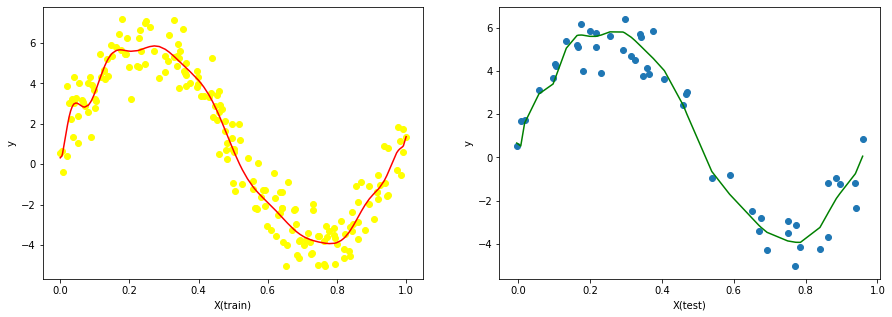

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of train set
axes[0].scatter(np.transpose(x_train)[1], y_train, c='yellow')

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_train)[1], reg.predict(x_train)), key=lambda x: x[0])))
axes[0].plot(unziped[0], unziped[1], c='red')

# scatter plot of test set
axes[1].scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes[1].plot(unziped[0], unziped[1], c='green')


axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
axes[0].set_xlabel('X(train)')
axes[0].set_ylabel('y')
plt.show()

Evaluation

In [84]:
np.sqrt(mean_squared_error(y_test,predictions))

0.8053381071552244

In [85]:
explained_variance_score(y_test,predictions)

0.9500396237580284